Adaptado do livro "Generative Deep Learning: Teaching Machines to Paint, Write, Compose and Play; Autor: David Foster".
Notebook criado por Pedro Martelleto

# Introdução

# Layers de transposição convolucional

![title](images/ConvTranspose.gif)

![title](images/ConvKernel.png)

# Layers de upsampling

![title](images/Upsampling-layer.png)

# Introdução à GANs

![title](images/Cats_QuickDraw.png)

![title](images/GAN_Intro.png)


## Normal multivariada -> Ruído -> Espaço latente ($\mathbb{R}^{100}$)

# Treinamento de GANs

# Função perda

## Entropia cruzada binária

## $y_i$ -> Classificação da imagem i (0 ou 1), $p_i$ -> Probabilidade da imagem ser 1

## Verossimilhança: $\prod_{i=1}^{n} p_i^{y_i} \cdot (1-p_i)^{(1-y_i)}$

![title](images/BinaryCrossEntropy.png)

## X -> Imagens, Z -> Normal multivariada (gera os ruídos)

![title](images/DiscriminatorLoss.png)

![title](images/GeneratorLoss.png)

## O gerador e o discriminador têm processos de treinamento diferentes. Então, como treinamos o GAN como um todo?

## O treinamento GAN prossegue em períodos alternados:

## 1. O discriminador treina por uma ou mais epochs.
## 2. O gerador treina por uma ou mais epochs.

Traduzido de: https://developers.google.com/machine-learning/gan/training

## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

# Dados

In [10]:
(x_train, y_train) = load_safari(DATA_NAME)

In [11]:
x_train.shape

(80000, 28, 28, 1)

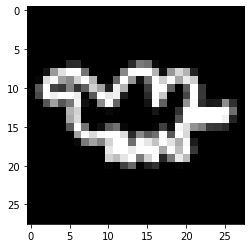

In [12]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

# Arquitetura

In [13]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [14]:
gan.discriminator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [15]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
activation_4 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

# Treino

In [16]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [17]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

0 [D loss: (0.768)(R 0.680, F 0.856)] [D acc: (0.461)(0.922, 0.000)] [G loss: 0.674] [G acc: 1.000]
1 [D loss: (0.740)(R 0.658, F 0.822)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.685] [G acc: 1.000]
2 [D loss: (0.687)(R 0.679, F 0.696)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.677] [G acc: 1.000]
3 [D loss: (0.701)(R 0.662, F 0.739)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.663] [G acc: 1.000]
4 [D loss: (0.679)(R 0.645, F 0.714)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.549] [G acc: 1.000]
5 [D loss: (0.620)(R 0.533, F 0.708)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.018] [G acc: 1.000]
6 [D loss: (0.367)(R 0.038, F 0.696)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
7 [D loss: (0.347)(R 0.000, F 0.695)] [D acc: (0.641)(1.000, 0.281)] [G loss: 0.000] [G acc: 1.000]
8 [D loss: (0.372)(R 0.000, F 0.745)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.001] [G acc: 1.000]
9 [D loss: (0.481)(R 0.010, F 0.952)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.522] [G acc: 1.000]


# Resultados

![title](images/Epochs.jpg)

![title](images/GAN_Novelty.jpg)

# Função perda ao longo do tempo

## Função perda oscilante

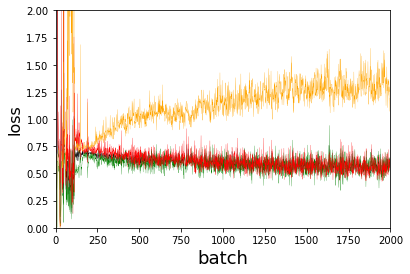

In [20]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


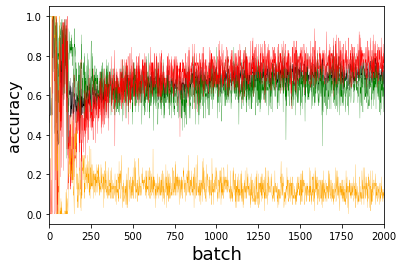

In [21]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

## Colapso da moda

![title](images/ModeCollapse.png)

### Suppose we train the generator over several batches without updating the discriminator in between. The generator would be inclined to find a single observation (also known as a mode) that always fools the discriminator and would start to map every point in the latent input space to this observation.

## Função perda pouco informativa

## Híperparâmetros

### 1. batch normalization
### 2. dropout
### 3. learning rate
### 4. activation layers
### 5. convolutional filters
### 6. kernel size
### 7. striding
### 8. batch size
### 9. latent space size